In [1]:
# Import necessary modules 
import requests 
import json 
 
# Ask user for their Spotify token 
spotify_token = input("Please enter your Spotify token: ") 
 
# Set the necessary headers for the API request 
headers = { 
  "Accept": "application/json", 
  "Content-Type": "application/json", 
  "Authorization": f"Bearer {spotify_token}" 
}

In [2]:
# Send a GET request to the Spotify API to retrieve the last 5 songs listened 
response = requests.get("https://api.spotify.com/v1/me/player/recently-played?limit=5", headers=headers) 
 
# Check the status code of the response to make sure it was successful 
if response.status_code != 200: 
  print("There was an error retrieving the songs from Spotify.") 
 
# If the request was successful, parse the response data 
else: 
  data = json.loads(response.text) 
 
  # Loop through the list of songs and print their names 
  tracks = []

  for track in data["items"]: 
    tracks.append(track['track']['id'])
    print(f"Track: {track['track']['name']}")

print(tracks)

Track: The End Is Never The End
Track: Edouard
Track: Elle
Track: Candy from Strangers
Track: Sometimes I Hear Sirens
['5FqxUTcZVjbpk4LLeZcKUs', '0o9ReYQQNZ5JxHjwW45goX', '7om9kO3jqzqhiAiFLuL7xw', '4E6D7ZDOloEH57f5mWrUBz', '0j60bMsg6WEAgCeBzijxlm']


In [3]:
valence_values = []
arousal_values = []

for i in range(5):
    # Replace "SONG_ID" with the ID of the song you want to analyze
    song_id = tracks[i]

    # Make a GET request to the /audio-features endpoint of the Spotify Web API
    response = requests.get(
        f"https://api.spotify.com/v1/audio-features/{song_id}",
        headers={"Authorization": f"Bearer {spotify_token}"},
    )

    # Parse the response as JSON
    audio_features = response.json()

    # Print the valence and arousal values for the song
    valence_values.append(audio_features["valence"])
    arousal_values.append(audio_features["energy"])
    print("Valence:", audio_features["valence"])
    print("Arousal:", audio_features["energy"])

Valence: 0.153
Arousal: 0.99
Valence: 0.7
Arousal: 0.838
Valence: 0.559
Arousal: 0.684
Valence: 0.172
Arousal: 0.932
Valence: 0.273
Arousal: 0.706


<BarContainer object of 5 artists>

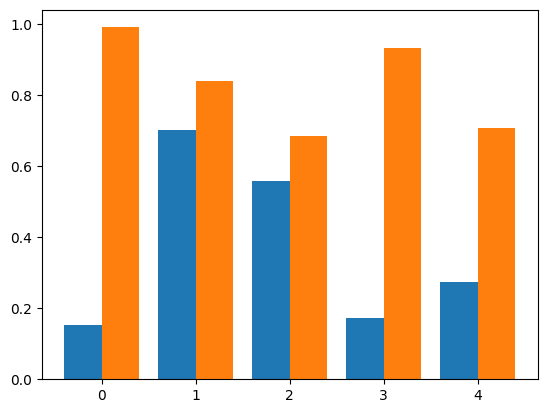

In [4]:
# Show results
import numpy as np
import matplotlib.pyplot as plt

X = ['Song 1', 'Song 2', 'Song 3', 'Song 4', 'Song 5']
  
X_axis = np.arange(len(X))

plt.figure()
plt.bar(X_axis - 0.2, valence_values, 0.4, label = 'Valence')
plt.bar(X_axis + 0.2, arousal_values, 0.4, label = 'Arousal')

In [29]:
# VA mapping 

import numpy as np
from VAmapping import assign_colors_to_quadrants
from VAmapping import convert_range

coordinates = np.zeros((5,2))

for i in range(5):
    x = convert_range(valence_values[i])
    y = convert_range(arousal_values[i])
    coordinates[i, 0] = x
    coordinates[i, 1] = y

print(coordinates)

# x = coordinates[:, 0]
# y = coordinates[:, 1]
# RGBA_colors = assign_colors_to_quadrants(x, y)
# print(RGBA_colors)


# from VAmapping import plot_colors

# plot_colors(RGBA_colors)

[[-0.694  0.98 ]
 [ 0.4    0.676]
 [ 0.118  0.368]
 [-0.656  0.864]
 [-0.454  0.412]]


-0.694 0.98


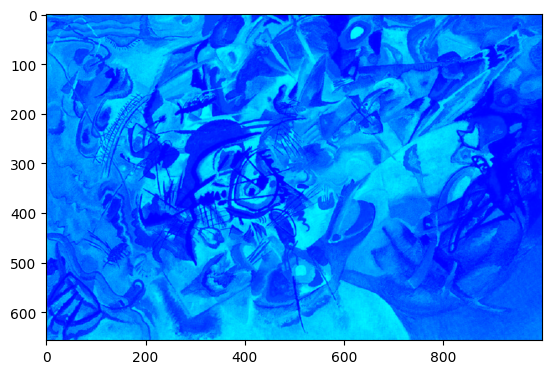

In [42]:
# Use just the first song

x1 = coordinates[0, 0]
y1 = coordinates[0, 1]

print(x1, y1)

import cv2

# load the image
img = cv2.imread('kandinsky7.jpeg')

## Change color palette of the image according to the quadrant of the VA plane

# Quadrant I: x > 0, y > 0
if x1 > 0 and y1 > 0:
    colormap = cv2.COLORMAP_SPRING # yellow/pink, euphoria
# Quadrant II: x < 0, y > 0
elif x1 < 0 and y1 > 0:
    colormap = cv2.COLORMAP_AUTUMN #red/yellow, anger
# Quadrant III: x < 0, y < 0
elif x1 < 0 and y1 < 0:
    colormap = cv2.COLORMAP_OCEAN # blue, sadness  
# Quadrant IV: x > 0, y < 0
elif x1 > 0 and y1 < 0:
    colormap = cv2.COLORMAP_SUMMER #green, relax

# apply the new color map to the image
img = cv2.applyColorMap(img, colormap)

# show the resulting image
plt.imshow(img)

In [43]:
cv2.imwrite('style.png', img)

True